<a href="https://colab.research.google.com/github/mxn170019/TensorFlow_Exercises/blob/master/RailCar_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Model, layers



Using TensorFlow backend.


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
classes = ['Boxcar','coilcar','Combinecar','Flatcar','rotary dump car','tankcar']

In [0]:
path = Path('')

In [6]:
for class_name in classes:
    folder = class_name
    file = f'{class_name}.txt'.replace('-','_')
    dest = path/folder
    dest.mkdir(parents = True,exist_ok = True)
    print(file)
    download_images(path/file,dest,max_pics = 400)

Process Process-39:
Process Process-37:
Process Process-34:
Process Process-40:
Process Process-38:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/concurrent/futures/process.py", line 169, in _process_worker
    call_item = call_queue.get(block=True)
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  F

KeyboardInterrupt: ignored

In [0]:
for folder in classes:
    print(folder)
    verify_images(path/folder,delete=True,max_size=400)
    

In [0]:
!ls

In [0]:
# # Creating Train / Test folders (One time use)
root_dir = ''
train_dir = os.path.join(root_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(root_dir, 'val')
os.mkdir(val_dir)

In [0]:

for folder in classes:
    print(folder)
    train_cls = os.path.join(train_dir, folder)
    os.mkdir(train_cls)
    val_cls = os.path.join(val_dir, folder)
    os.mkdir(val_cls)
    
    currentCls = folder
    src = ""+currentCls # Folder to copy images from
    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames,c  = np.split(np.array(allFileNames),[int(len(allFileNames)*0.85), int(len(allFileNames))])
    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, train_cls)
    for name in val_FileNames:
        shutil.copy(name, val_cls)


In [0]:
for folder in classes:
    shutil.rmtree(os.path.join("",folder), ignore_errors=True)


In [44]:
for folder in classes:
    print('Total training ',folder,' images:', len(os.listdir(os.path.join(train_dir,folder))))
    print('Total validation ',folder,' images:', len(os.listdir(os.path.join(val_dir,folder))))


Total training  Boxcar  images: 220
Total validation  Boxcar  images: 39
Total training  coilcar  images: 79
Total validation  coilcar  images: 14
Total training  Combinecar  images: 79
Total validation  Combinecar  images: 14
Total training  Flatcar  images: 68
Total validation  Flatcar  images: 12
Total training  rotary dump car  images: 78
Total validation  rotary dump car  images: 14
Total training  tankcar  images: 77
Total validation  tankcar  images: 14


In [0]:
%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

train_boxcar_dir = os.path.join(train_dir,'Boxcar')
train_coilcar_dir = os.path.join(train_dir,'coilcar')
train_Combinecar_dir = os.path.join(train_dir,'Combinecar')
train_rotary_dump_car_dir = os.path.join(train_dir,'Flatcar')
train_tankcar_dir = os.path.join(train_dir,'rotary dump car')
train_Flatcar_dir =  os.path.join(train_dir,'tankcar')                        


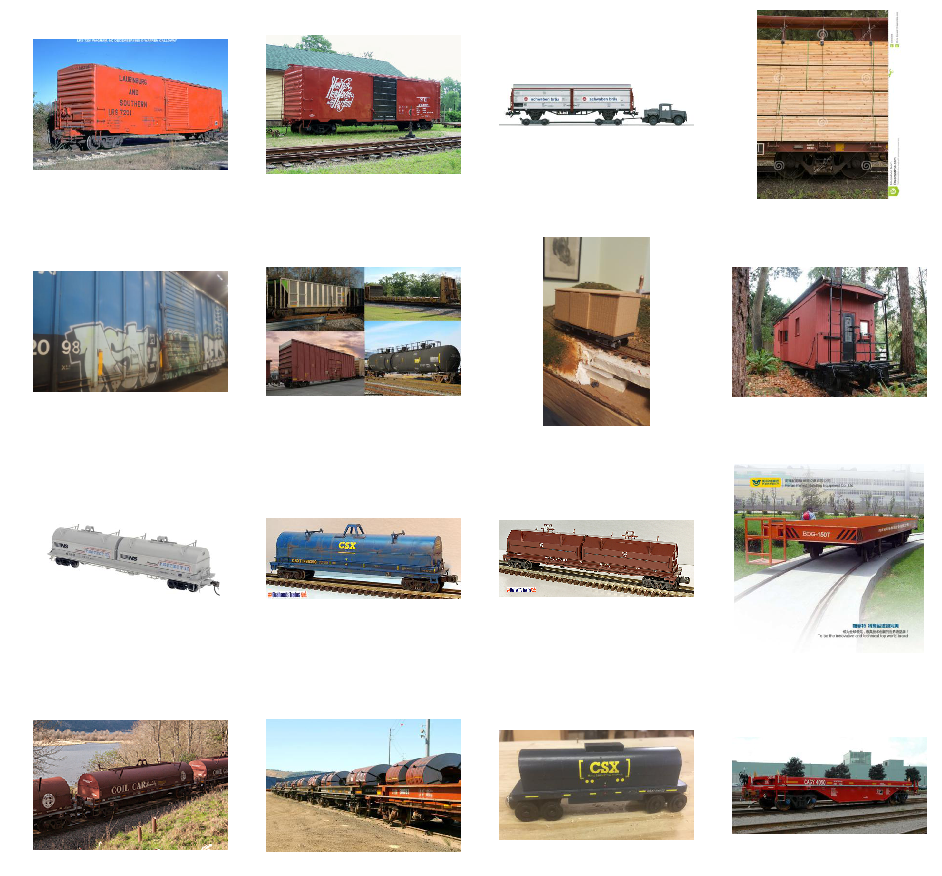

In [46]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_boxcar_pix = [os.path.join(train_boxcar_dir, fname) 
                for fname in os.listdir(train_boxcar_dir)[pic_index-8:pic_index]]

next_coilcar_pix = [os.path.join(train_coilcar_dir, fname) 
                for fname in os.listdir(train_coilcar_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_boxcar_pix+next_coilcar_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Building a Small Model from Scratch


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'train',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=595,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode="categorical",
        classes=classes)

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'val',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=103,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode="categorical",
        classes=classes)

Found 594 images belonging to 6 classes.
Found 106 images belonging to 6 classes.


In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(6, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)       

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['acc'])

In [51]:
model.fit_generator(train_generator,steps_per_epoch = 1,
                   epochs=20,
                  validation_data=validation_generator,
                  validation_steps=1,
                   verbose = 2)

Epoch 1/20
Epoch 1/20
1/1 - 1s - loss: 1.7250 - acc: 0.3689
1/1 - 5s - loss: 1.8039 - acc: 0.1246 - val_loss: 1.7250 - val_acc: 0.3689
Epoch 2/20
Epoch 1/20
1/1 - 0s - loss: 1.6711 - acc: 0.3689
1/1 - 1s - loss: 1.7253 - acc: 0.3670 - val_loss: 1.6711 - val_acc: 0.3689
Epoch 3/20
Epoch 1/20
1/1 - 0s - loss: 1.6947 - acc: 0.3689
1/1 - 2s - loss: 1.6792 - acc: 0.3670 - val_loss: 1.6947 - val_acc: 0.3689
Epoch 4/20
Epoch 1/20
1/1 - 0s - loss: 1.6670 - acc: 0.3689
1/1 - 2s - loss: 1.7033 - acc: 0.3670 - val_loss: 1.6670 - val_acc: 0.3689
Epoch 5/20
Epoch 1/20
1/1 - 0s - loss: 1.6726 - acc: 0.3689
1/1 - 2s - loss: 1.6666 - acc: 0.3670 - val_loss: 1.6726 - val_acc: 0.3689
Epoch 6/20
Epoch 1/20
1/1 - 0s - loss: 1.6741 - acc: 0.3689
1/1 - 2s - loss: 1.6678 - acc: 0.3670 - val_loss: 1.6741 - val_acc: 0.3689
Epoch 7/20
Epoch 1/20
1/1 - 0s - loss: 1.6682 - acc: 0.3689
1/1 - 2s - loss: 1.6665 - acc: 0.3670 - val_loss: 1.6682 - val_acc: 0.3689
Epoch 8/20
Epoch 1/20
1/1 - 0s - loss: 1.6577 - acc: 0.

# Transfer learning


In [0]:
base_model = tf.keras.applications.ResNet50(include_top=False,weights='imagenet')

In [0]:
base_model.trainable = False


In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
attention_layer = tf.keras.layers.Dense(128, activation='relu')
prediction_layer = tf.keras.layers.Dense(6,activation='sigmoid')


model1 = tf.keras.Sequential([
  base_model,
    attention_layer,
  global_average_layer,
  prediction_layer
])

In [0]:
model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, None, None, 2048)  23587712  
_________________________________________________________________
dense_2 (Dense)              (None, None, None, 128)   262272    
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 23,850,758
Trainable params: 263,046
Non-trainable params: 23,587,712
_________________________________________________________________


In [18]:
model1.fit_generator(train_generator,steps_per_epoch = 1,
                   epochs=20,
                  validation_data=validation_generator,
                  validation_steps=1,
                   verbose = 2)

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
1/1 - 4s - loss: 1.7863 - acc: 0.3592
1/1 - 20s - loss: 2.2656 - acc: 0.1313 - val_loss: 1.7863 - val_acc: 0.3592
Epoch 2/20
Epoch 1/20
1/1 - 1s - loss: 1.7500 - acc: 0.3592
1/1 - 5s - loss: 1.7099 - acc: 0.3670 - val_loss: 1.7500 - val_acc: 0.3592
Epoch 3/20
Epoch 1/20
1/1 - 1s - loss: 1.7291 - acc: 0.3592
1/1 - 5s - loss: 1.6012 - acc: 0.3670 - val_loss: 1.7291 - val_acc: 0.3592
Epoch 4/20
Epoch 1/20
1/1 - 1s - loss: 1.7198 - acc: 0.3592
1/1 - 5s - loss: 1.5299 - acc: 0.3670 - val_loss: 1.7198 - val_acc: 0.3592
Epoch 5/20
Epoch 1/20
1/1 - 1s - loss: 1.7208 - acc: 0.3592
1/1 - 5s - loss: 1.4263 - acc: 0.3670 - val_loss: 1.7208 - val_acc: 0.3592
Epoch 6/20
Epoch 1/20
1/1 - 1s - loss: 1.7336 - acc: 0.3592
1/1 - 5s - loss: 1.3084 - acc: 0.3670 - val_loss: 1.7336 - val_acc: 0.3592
Epoch 7/20
Epoch 1/20
1/1 - 1s - loss: 1.7518 - acc: 0.3592
1/1 - 5s - loss: 1.2325 - acc: 0.36

In [0]:
model1.fit_generator(train_generator,steps_per_epoch = 1,
                   epochs=200,
                  validation_data=validation_generator,
                  validation_steps=1,
                   verbose = 2)

Epoch 1/200
Epoch 1/200
1/1 - 1s - loss: 1.9075 - acc: 0.3592
1/1 - 7s - loss: 0.7105 - acc: 0.3670 - val_loss: 1.9075 - val_acc: 0.3592
Epoch 2/200
Epoch 1/200
1/1 - 1s - loss: 1.9113 - acc: 0.3592
1/1 - 5s - loss: 0.6907 - acc: 0.3670 - val_loss: 1.9113 - val_acc: 0.3592
Epoch 3/200
Epoch 1/200
1/1 - 1s - loss: 1.9125 - acc: 0.3592
1/1 - 5s - loss: 0.6729 - acc: 0.3670 - val_loss: 1.9125 - val_acc: 0.3592
Epoch 4/200
Epoch 1/200
1/1 - 1s - loss: 1.9165 - acc: 0.3592
1/1 - 5s - loss: 0.6585 - acc: 0.3670 - val_loss: 1.9165 - val_acc: 0.3592
Epoch 5/200
Epoch 1/200
1/1 - 1s - loss: 1.9262 - acc: 0.3592
1/1 - 5s - loss: 0.6465 - acc: 0.3670 - val_loss: 1.9262 - val_acc: 0.3592
Epoch 6/200
Epoch 1/200
1/1 - 1s - loss: 1.9411 - acc: 0.3592
1/1 - 5s - loss: 0.6347 - acc: 0.3670 - val_loss: 1.9411 - val_acc: 0.3592
Epoch 7/200
Epoch 1/200
1/1 - 1s - loss: 1.9580 - acc: 0.3592
1/1 - 5s - loss: 0.6228 - acc: 0.3670 - val_loss: 1.9580 - val_acc: 0.3592
Epoch 8/200
